<a href="https://colab.research.google.com/github/SumitraMukherjee/analytics/blob/master/SM_covid_G7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare COVID-19 incidence and deaths for G7 countries:
- Canada
- France
- Germany
- Italy
- Japan
- The United Kingdom
- United States of America

Data source WHO: https://covid19.who.int/WHO-COVID-19-global-data.csv

We shall plot:
- new cases over time
- new cases per million population
- total deaths over time
- total deaths per million population


## Import libraries

In [1]:
import pandas as pd # for data handling
import matplotlib.pyplot as plt # to plot

## Specify population of G7 countries

In [2]:
G7 = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'The United Kingdom', 
      'United States of America'] # list of G7 countries
# Population in millions 
# source: https://en.wikipedia.org/wiki/Group_of_Seven#Member_country_data
population = [35.467, 63.951, 80.940, 60.666, 127.061, 64.511, 318.523]
POP = dict(zip(G7, population))
print("Population of G7 countries:")
for country in POP:
    print('\t', country, ': ', POP[country], ' million')

Population of G7 countries:
	 Canada :  35.467  million
	 France :  63.951  million
	 Germany :  80.94  million
	 Italy :  60.666  million
	 Japan :  127.061  million
	 The United Kingdom :  64.511  million
	 United States of America :  318.523  million


## Get *World Health Organization* data

In [3]:
who_url = "https://covid19.who.int/WHO-COVID-19-global-data.csv" # URL
df = pd.read_csv(who_url) # read CSV file
df['Date_reported'] = pd.to_datetime(df.Date_reported, format='%Y-%m-%d')
df = df[df['Country'].isin(G7)] # retain G7 data
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
166613,2022-01-01,US,United States of America,AMRO,571680,54080505,1227,817969
166614,2022-01-02,US,United States of America,AMRO,447219,54527724,1183,819152
166615,2022-01-03,US,United States of America,AMRO,259050,54786774,248,819400
166616,2022-01-04,US,United States of America,AMRO,364009,55150783,286,819686
166617,2022-01-05,US,United States of America,AMRO,821331,55972114,1722,821408


## Function to plot data

In [4]:
def plot_data(df, metric, W=7, per_million=False):
    data = pd.DataFrame()
    data['date'] = df.Date_reported.unique() # date
    for country in G7: # for each G7 country
        v = df[['Date_reported', metric]][df['Country']==country]
        if per_million:
            v[metric] = v[metric]/POP[country]
        v.columns = ['date', country]
        data = data.merge(v, on='date')
    df1 = data.rolling(W).mean()
    df1.insert(0, 'date', data.date)
    ax = df1.plot(x='date', y = G7, figsize=(20,10))
    unit = '' if not per_million else " (per million)"
    title = "%d day rolling average: %s %s" %(W, metric, unit)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel(metric + unit, fontsize=16)
    _ = plt.suptitle(title, fontsize=20)




## New cases over time

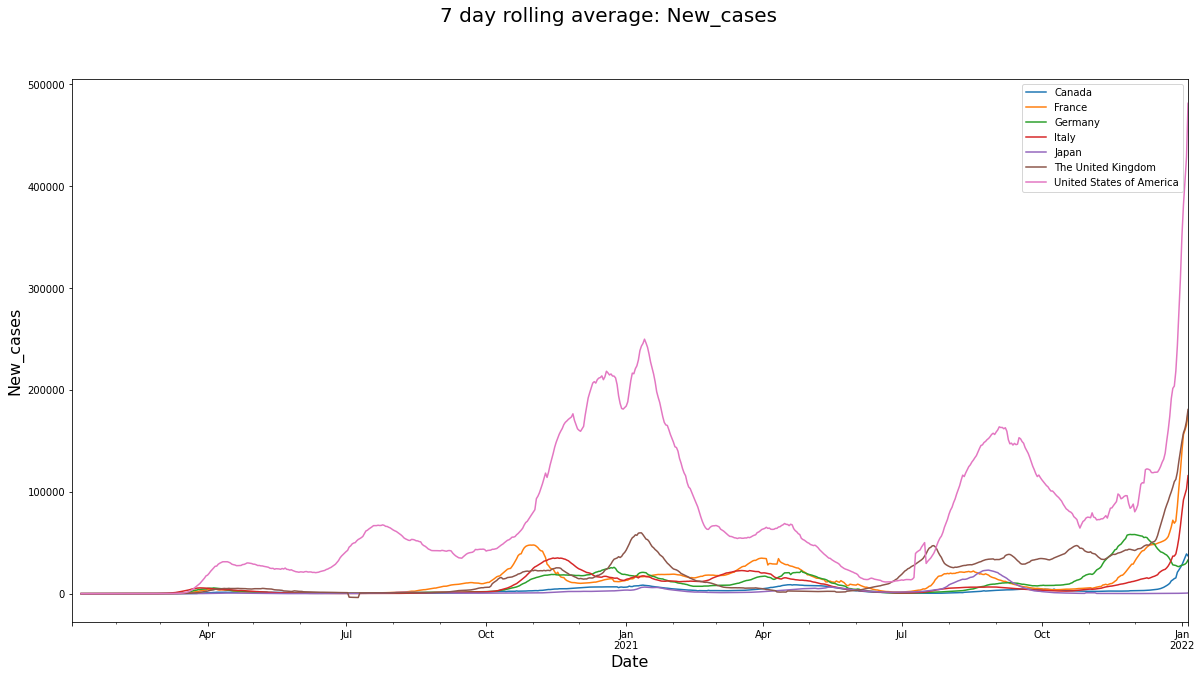

In [5]:
plot_data(df, 'New_cases', W=7, per_million=False)

## New cases per million over time

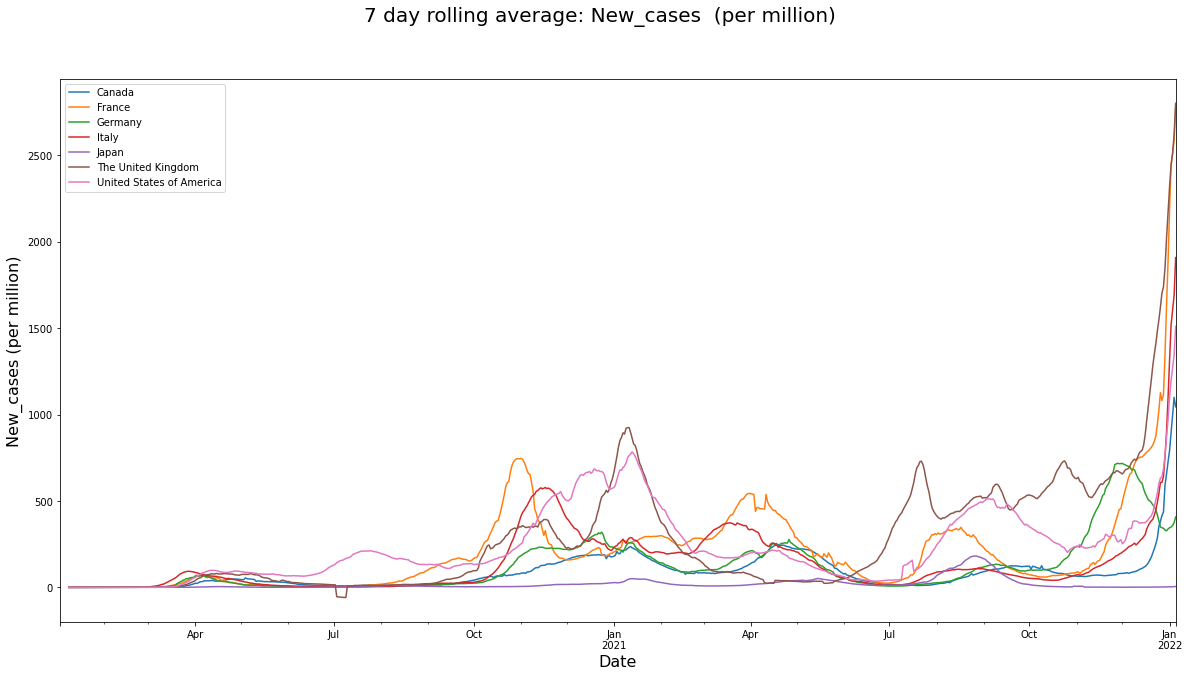

In [6]:
plot_data(df, 'New_cases', W=7, per_million=True)

## Total deaths over time

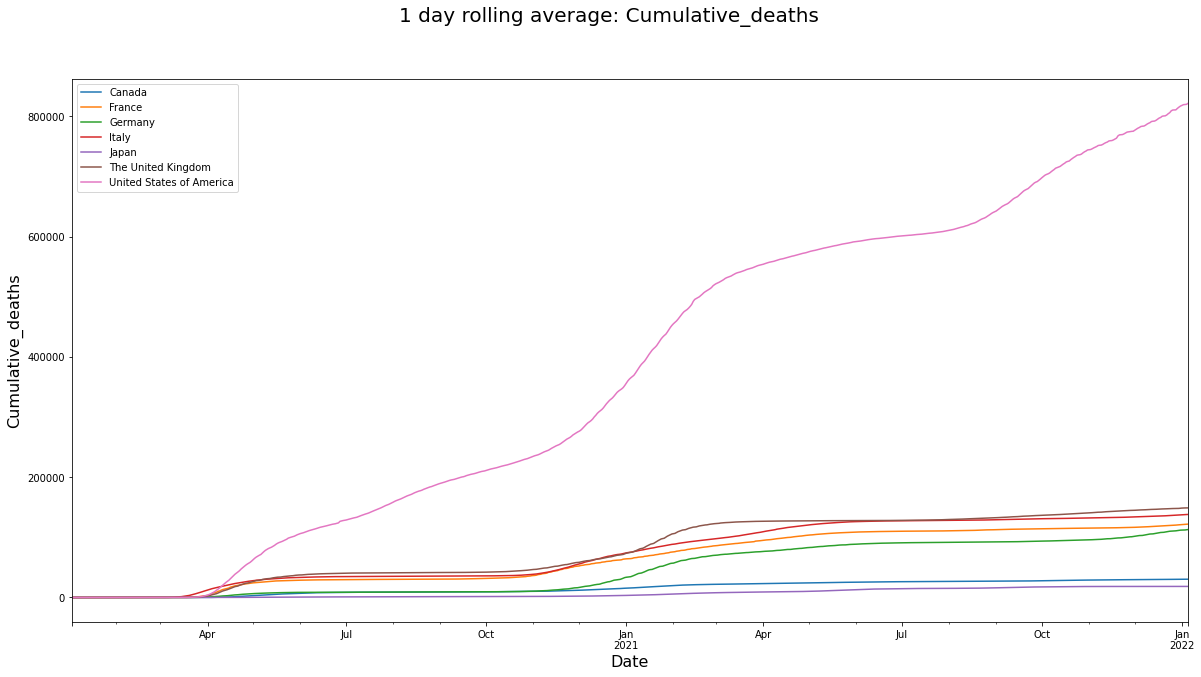

In [7]:
plot_data(df, 'Cumulative_deaths', W=1, per_million=False)

## Total deaths per million over time

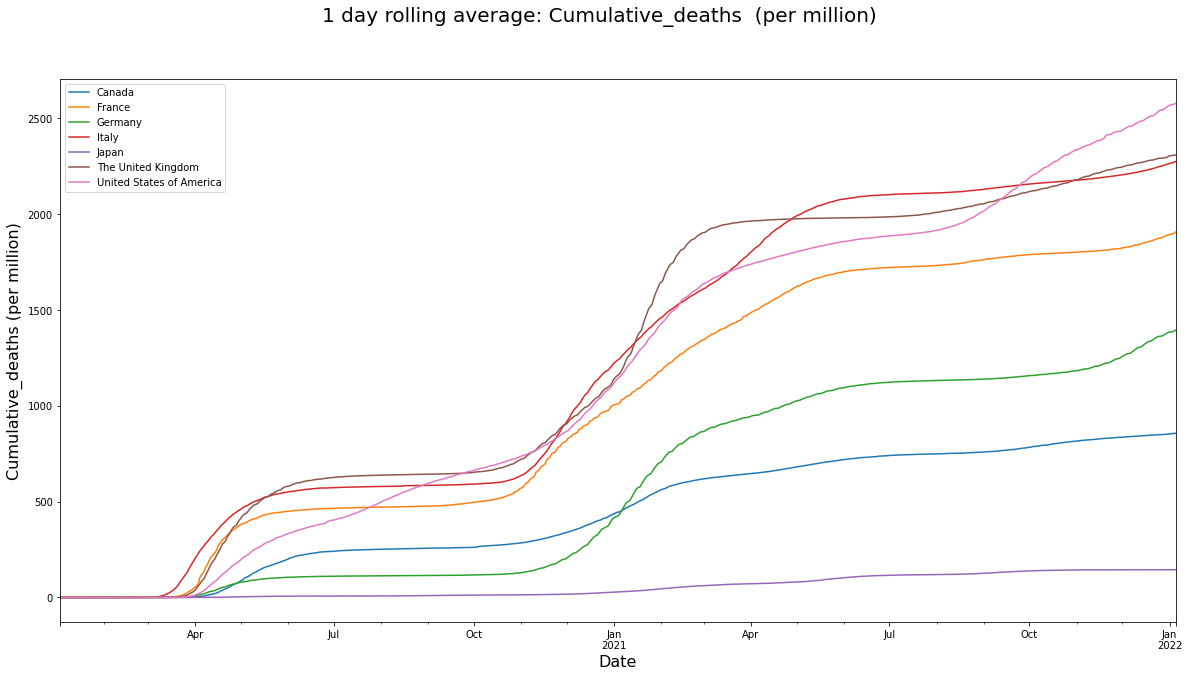

In [8]:
plot_data(df, 'Cumulative_deaths', W=1, per_million=True)